In [5]:
import pandas as pd
import random
from datetime import datetime, timedelta

# 1. Configuration: Define our categories and types
income_categories = ['Salary', 'Freelance', 'Bonus']
expense_categories = ['Rent', 'Groceries', 'Dining Out', 'Internet', 'Transport', 'Shopping', 'Utilities']
all_categories = income_categories + expense_categories

data = []
start_date = datetime(2026, 1, 1) # Starting from Jan 1st, 2026

# 2. Loop to generate 200 random transactions
for i in range(200):
    # Randomize the date within 60 days of the start date
    current_date = start_date + timedelta(days=random.randint(0, 60))
    category = random.choice(all_categories)
    
    # Logic: If category is in income_categories, set Type to 'Income'
    if category in income_categories:
        transaction_type = 'Income'
        amount = random.randint(5000, 50000) # Higher amounts for income
    else:
        transaction_type = 'Expense'
        amount = random.randint(100, 8000) # Lower amounts for expenses
        
    # Append the row to our list
    data.append([current_date.strftime('%Y-%m-%d'), category, amount, transaction_type])

# 3. Create a DataFrame (A table structure)
df = pd.DataFrame(data, columns=['Date', 'Category', 'Amount', 'Type'])

# 4. Save the table as a CSV file on your laptop
df.to_csv('raw_budget_data.csv', index=False)

print("Success! 'raw_budget_data.csv' has been created in your folder.")

Success! 'raw_budget_data.csv' has been created in your folder.


In [6]:
import pandas as pd

# 1. Load the raw data we created in Step 1
df = pd.read_csv('raw_budget_data.csv')

# 2. Inspect the data (Checking if everything looks correct)
print("--- First 5 rows of your data ---")
print(df.head())

# 3. Data Cleaning: Convert 'Date' column to a proper Date format
# This is crucial for time-based analysis later
df['Date'] = pd.to_datetime(df['Date'])

# 4. Checking for any missing values (Good practice!)
print("\n--- Missing Values Check ---")
print(df.isnull().sum())

# 5. Core Analysis: Calculate Financial Totals
total_income = df[df['Type'] == 'Income']['Amount'].sum()
total_expense = df[df['Type'] == 'Expense']['Amount'].sum()
net_savings = total_income - total_expense

# Calculate Savings Rate
savings_rate = (net_savings / total_income) * 100

print(f"\n--- Financial Summary ---")
print(f"Total Income:  ${total_income:,}")
print(f"Total Expense: ${total_expense:,}")
print(f"Net Savings:   ${net_savings:,}")
print(f"Savings Rate:  {savings_rate:.2f}%")

# 6. Deep Dive: Top 3 Spending Categories
print("\n--- Top 3 Spending Categories ---")
top_expenses = df[df['Type'] == 'Expense'].groupby('Category')['Amount'].sum().sort_values(ascending=False)
print(top_expenses.head(3))

# 7. Export the Cleaned Data
# This 'cleaned' version is what we will use for Power BI/Excel
df.to_csv('cleaned_budget_data.csv', index=False)
print("\nSuccess! 'cleaned_budget_data.csv' is saved and ready for visualization.")

--- First 5 rows of your data ---
         Date    Category  Amount     Type
0  2026-01-03    Shopping    1876  Expense
1  2026-02-16  Dining Out    5049  Expense
2  2026-02-20   Utilities     946  Expense
3  2026-02-26   Transport    4152  Expense
4  2026-01-21   Groceries    6017  Expense

--- Missing Values Check ---
Date        0
Category    0
Amount      0
Type        0
dtype: int64

--- Financial Summary ---
Total Income:  $1,759,102
Total Expense: $594,563
Net Savings:   $1,164,539
Savings Rate:  66.20%

--- Top 3 Spending Categories ---
Category
Internet     110872
Groceries    100790
Rent          98198
Name: Amount, dtype: int64

Success! 'cleaned_budget_data.csv' is saved and ready for visualization.


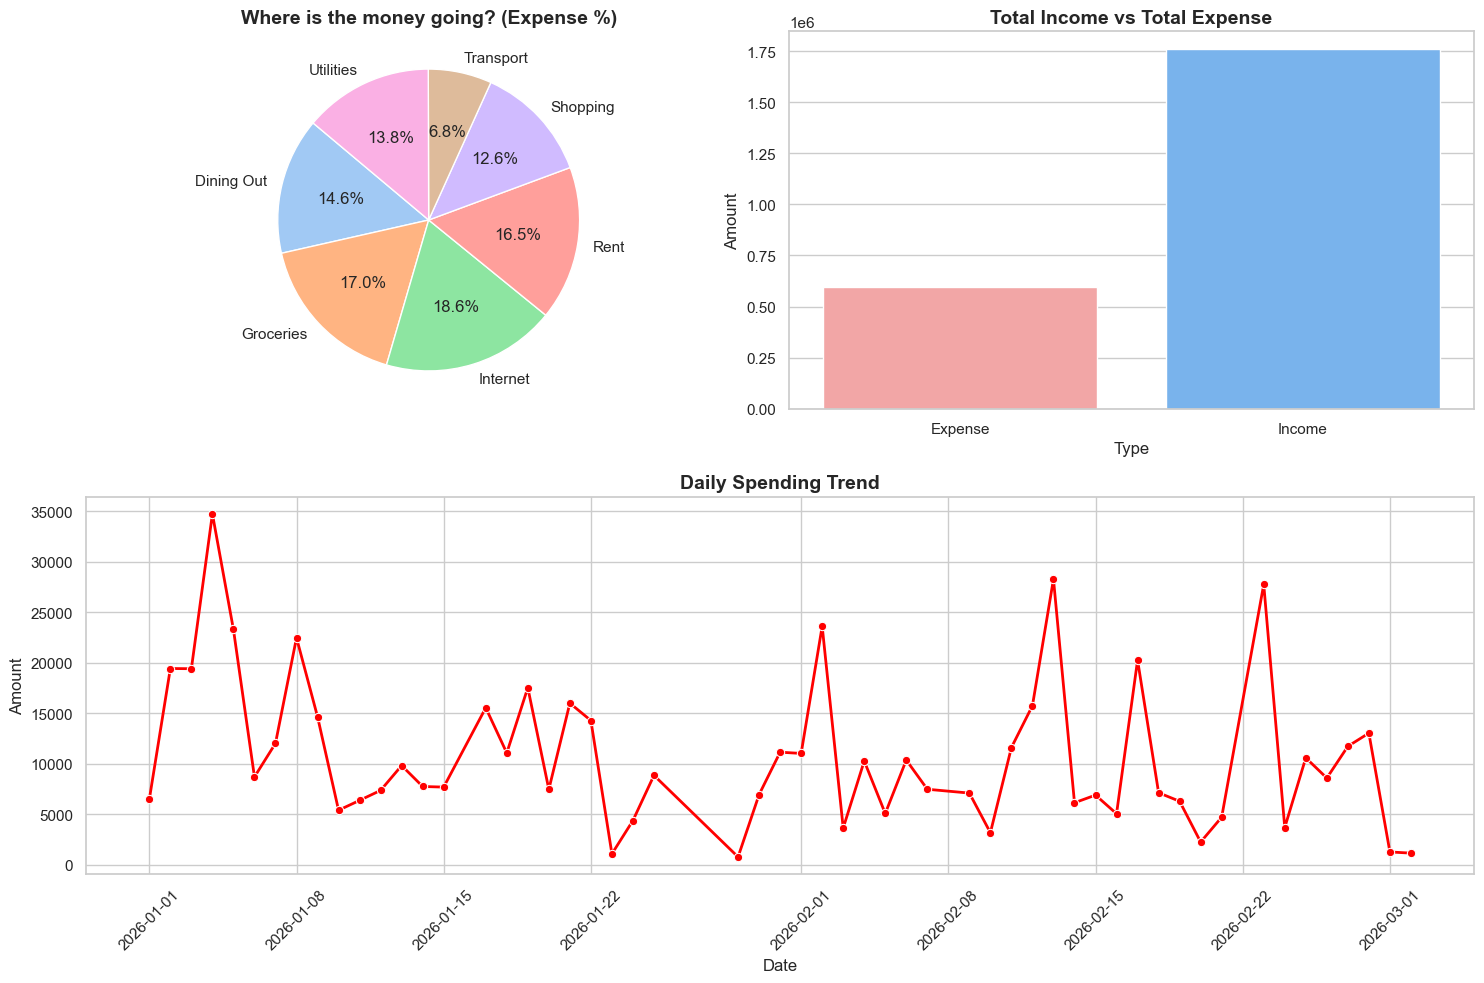

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
df = pd.read_csv('cleaned_budget_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Set style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10))

# --- CHART 1: Expense Distribution ---
plt.subplot(2, 2, 1)
expense_data = df[df['Type'] == 'Expense'].groupby('Category')['Amount'].sum()
plt.pie(expense_data, labels=expense_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Where is the money going? (Expense %)', fontsize=14, fontweight='bold')

# --- CHART 2: Income vs Expense (FIXED VERSION) ---
plt.subplot(2, 2, 2)
summary_data = df.groupby('Type')['Amount'].sum().reset_index()
# Added hue='Type' and legend=False here to fix the warning
sns.barplot(x='Type', y='Amount', data=summary_data, hue='Type', palette=['#ff9999','#66b3ff'], legend=False)
plt.title('Total Income vs Total Expense', fontsize=14, fontweight='bold')

# --- CHART 3: Daily Spending Trend ---
plt.subplot(2, 1, 2)
daily_trend = df[df['Type'] == 'Expense'].groupby('Date')['Amount'].sum().reset_index()
sns.lineplot(x='Date', y='Amount', data=daily_trend, marker='o', color='red', linewidth=2)
plt.title('Daily Spending Trend', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()